<a href="https://colab.research.google.com/github/E-wave112/ml_proj_2/blob/master/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

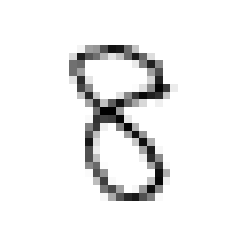

AttributeError: ignored

In [ ]:
#usie neural nets for the mnist dataset problem
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
mnist =fetch_openml('mnist_784')

X, y = mnist["data"], mnist["target"]
some_digit = X[3600]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()
#print(mnist.DESCR)
#print(y[3600])

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train = (y_train == 5)
y_test = (y_test == 5)
##preprocessing goes here
'''
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
feature_columns=feature_columns)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)
y_pred = dnn_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
'''


In [ ]:
#another sample with keras 
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
tf.enable_v2_behavior()
#setup a training instance
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print(type(ds_train))
print(type(ds_test))

def normalis(image,label):
  'normalizes images from uint8 to float32 object'
  return tf.cast(image,tf.float32)/255,label
#training pipeline  
ds_train = ds_train.map(normalis,num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

#evaluation pipeline
ds_test = ds_test.map(normalis,num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_train = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model =  tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']  
)

model.fit(
    ds_train,
    epochs = 10,
    validation_data = ds_test
)

  
  

<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
Epoch 1/10
79/79 [==============================] - 3s 44ms/step - loss: 0.7681 - accuracy: 0.7994 - val_loss: 0.3455 - val_accuracy: 0.9058
Epoch 2/10
79/79 [==============================] - 2s 24ms/step - loss: 0.3063 - accuracy: 0.9128 - val_loss: 0.2502 - val_accuracy: 0.9319
Epoch 3/10
79/79 [==============================] - 2s 23ms/step - loss: 0.2399 - accuracy: 0.9323 - val_loss: 0.2021 - val_accuracy: 0.9455
Epoch 4/10
79/79 [==============================] - 2s 24ms/step - loss: 0.1991 - accuracy: 0.9424 - val_loss: 0.1691 - val_accuracy: 0.9557
Epoch 5/10
79/79 [==============================] - 2s 26ms/step - loss: 0.1681 - accuracy: 0.9523 - val_loss: 0.1438 - val_accuracy: 0.9629
Epoch 6/10
79/79 [==============================] - 2s 24ms/step - loss: 0.1431 - accuracy: 0.9593 - val_loss: 0.1237 - val_accuracy: 0.9683
Epoch 7/10
79/79 [====

In [ ]:
#using raw tensorflow and numpy
#import tensorflow as tf
import tensorflow.compat.v1 as tf
#import tensorflow.compat.v2 as tf
#tf.disable_v2_behavior()

import numpy as np
import tensorflow_datasets as tfds
import tensorflow_dataset
mnist = tensorflow_datasets.load('mnist')
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
print(mnist)
(n_train, n_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
#n_train = mnist['train'].num_examples
#n_validation = mnist.validation.num_examples
#n_test = mnist['test'].num_examples

n_input = 784 #img pixels in area
n_hidden1 = 512
n_hidden2 = 256
n_hidden3 = 128
output = 10

#hyperparameters
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

#initialize the tensorflow graph
X = tf.compat.v1.placeholder('float',([None,n_input]))
Y = tf.compat.v1.placeholder('float',([None,output]))
keep_prob = tf.compat.v1.placeholder(tf.float32)

#add the weight and the tensors

weights = {
           "w1":tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1)),
           "w2":tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
           "w3":tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
           "out":tf.Variable(tf.truncated_normal([n_hidden3,output],stddev=0.1))
}

biases =  {
    'b1':tf.Variable(tf.constant(0.1,shape=[n_hidden1])),
    'b2':tf.Variable(tf.constant(0.1,shape=[n_hidden2])),
    'b3':tf.Variable(tf.constant(0.1,shape=[n_hidden3])),
    'out':tf.Variable(tf.constant(0.1,shape=[output]))    
}

layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

cross_entropy = tf.reduce_mean(tf.nn.soft_max_cross_entropy_with_logits(labels=Y,logits = output_layer))
train_step = tf.train.AdamOptimizer(1e-4),minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#using mini batch gradient descent
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )



{'test': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>, 'train': <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}


AttributeError: ignored

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
from tensorflow.keras.utils import to_categorical
#import tensorflow.compat.v2 as tf
#tf.disable_v2_behavior()

df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')
print(df.shape)

n_input = 784 #img pixels in area
n_hidden1 = 512
n_hidden2 = 256
n_hidden3 = 128
output = 10


#hyperparameters
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

#initialize the tensorflow graph
X = tf.compat.v1.placeholder('float',([None,n_input]))
Y = tf.compat.v1.placeholder('float',([None,output]))
keep_prob = tf.compat.v1.placeholder(tf.float32)

#weights and bias 


weights = {
           "w1":tf.Variable(tf.truncated_normal([n_input,n_hidden1],stddev=0.1)),
           "w2":tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2],stddev=0.1)),
           "w3":tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3],stddev=0.1)),
           "out":tf.Variable(tf.truncated_normal([n_hidden3,output],stddev=0.1))
}

biases =  {
    'b1':tf.Variable(tf.constant(0.1,shape=[n_hidden1])),
    'b2':tf.Variable(tf.constant(0.1,shape=[n_hidden2])),
    'b3':tf.Variable(tf.constant(0.1,shape=[n_hidden3])),
    'out':tf.Variable(tf.constant(0.1,shape=[output]))    
}

#graphing our tensorflow models

layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

#create a cross entropy and run session

cross_entropy = tf.reduce_mean(tf.nn.soft_max_cross_entropy_with_logits(labels=Y,logits = output_layer))
train_step = tf.train.AdamOptimizer(1e-4),minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#using mini batch gradient descent
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )




(42000, 785)


RuntimeError: ignored

In [ ]:
import tensorflow_datasets as tfds
mnist = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(mnist)


([<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>], tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)
)


In [ ]:
#another sample with keras 
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import pandas as pd
tfds.disable_progress_bar()
tf.enable_v2_behavior()
#setup a training instance
import numpy as np
from pandas import DataFrame
ds_train = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
ds_test = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')
X = ds_train
Y = ds_test
ds_train = np.array(ds_train)
print(X.shape)
ds_test = np.array(ds_test)

def normalis(image,label):
  'normalizes images from uint8 to float32 object'
  return tf.cast(image,tf.float32)/255,label
#training pipeline  

ds_train = ds_train/255.0
ds_train = ds_train.reshape(-1, 28*28)
ds_train = pd.DataFrame(ds_train,columns = X.columns)
#ds_train = ds_train.map(normalis,num_parallel_calls = tf.data.experimental.AUTOTUNE)
#ds_train = ds_train.cache()
#ds_train = ds_train.batch(128)
#ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

#evaluation pipeline
#ds_test = ds_test.map(normalis,num_parallel_calls = tf.data.experimental.AUTOTUNE)
ds_test = ds_test/255.0
ds_test = ds_test.reshape(-1, 28*28)
ds_test = pd.DataFrame(ds_test,columns = Y.columns)
#ds_train = ds_test.cache()
#ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


model =  tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']  
)

model.fit(
    ds_train,
    ds_test,
    epochs = 50
    
)


(42000, 785)


ValueError: ignored

(42000, 784) (28000, 784)


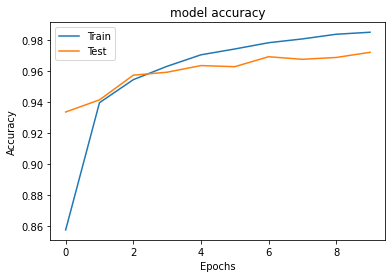

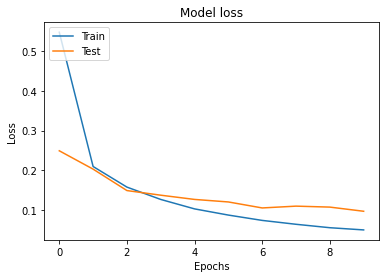

       ImageId  label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


"\nmodel.save('ann_model.hdf5')\npredictions = model.predict_classes(X_test)\nsubmission.Label = predictions\nsubmission.to_csv(('/content/drive/My Drive/testfolder/sumbisions.csv'), index=False)\n"

In [ ]:
import keras
import pandas as pd
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')

X_train = df.drop(labels = ["label"], axis = 1)
y_train = df['label']

X_test = df2

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train/255
X_test  = X_test/255

y_train = to_categorical(y_train)
#print(y_train[2])
print(X_train.shape, X_test.shape)



image_size = 784 # 28*28 + 1
num_classes = 10 # ten unique digits


model = Sequential()

model.add(Dense(units=100, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))
#model.summary()

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
model.save('ann_model.hdf5')
pred  = model.predict_classes(X_test,verbose=0)
pred = np.argmax(model.predict(X_test), axis=-1)


#visualizations to note the learning curve of our model
#model accuracy
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()


#model loss
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()


pred = pd.DataFrame({'ImageId':[i for i in range(1,28001)],"label":pred})
pred.to_csv('/content/drive/My Drive/testfolder/sumbissions2.csv',index=False)
print(pred)


'''
model.save('ann_model.hdf5')
predictions = model.predict_classes(X_test)
submission.Label = predictions
submission.to_csv(('/content/drive/My Drive/testfolder/sumbisions.csv'), index=False)
'''

#model generated a 76 percent accurracy using an sgd and a 92 per cent with adam

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


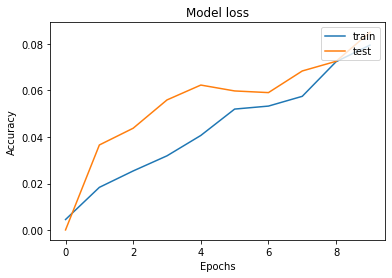

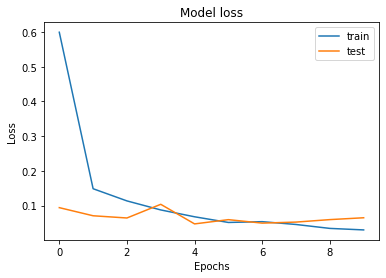

       ImageId  label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [ ]:
import keras
import numpy as np
import pandas as pd
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten # Dense layers are "fully connected" layers
from keras.models import Sequential
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')

X_train = df.drop("label",axis = 1)
y_train = df['label']
X_test = df2




X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train,10)
print(y_train[:10])

##build sequential model
model = Sequential()

##add conv model
model.add(Conv2D(50,kernel_size=(3,3),strides =(1,1),padding='valid',activation='relu',input_shape = (28,28,1)))

##pooling layer
model.add(MaxPool2D(pool_size=(1,1)))

#added conv
model.add(Conv2D(filters = 100, kernel_size= (5, 5), activation='relu'))
#added pool
model.add(MaxPool2D(pool_size=(1,1)))

##flatten the conv network
model.add(Flatten())

##hidden
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(192, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['Accuracy'])
#model.summary()

history = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=False,validation_split=0.1)

##learning curve for model accuracy
plt.title('Model loss')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc ='upper right')
plt.show()


##learning curve for model loss
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc ='upper right')
plt.show()

pred = np.argmax(model.predict(X_test),axis=-1)

predictions = pd.DataFrame({'ImageId':[i for i in range(1,28001)],"label":pred})
predictions.to_csv('/content/drive/My Drive/testfolder/sumbissionscnn.csv')
print(predictions)

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

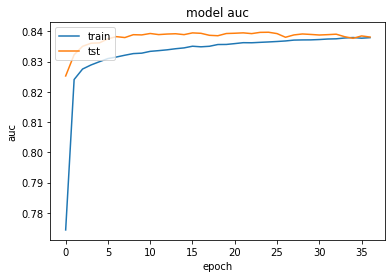

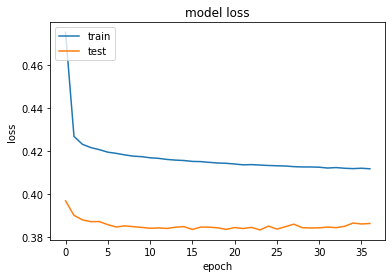

[[0.42089945]
 [0.4450394 ]
 [0.2730869 ]
 [0.86336887]
 [0.2048524 ]
 [0.24007717]
 [0.24186635]
 [0.6156172 ]
 [0.33660048]
 [0.33603406]
 [0.14975816]
 [0.06868067]
 [0.745433  ]
 [0.07322791]
 [0.34159195]
 [0.6069777 ]
 [0.2915061 ]
 [0.10169992]
 [0.23796132]
 [0.7232232 ]]
        Applicant_ID  default_status
0      Apcnt_1000032        0.420899
1      Apcnt_1000048        0.445039
2      Apcnt_1000052        0.273087
3      Apcnt_1000076        0.863369
4      Apcnt_1000080        0.204852
...              ...             ...
23995   Apcnt_999940        0.629950
23996   Apcnt_999956        0.126709
23997   Apcnt_999976        0.363744
23998   Apcnt_999984        0.690529
23999   Apcnt_999992        0.213911

[24000 rows x 2 columns]


In [ ]:
#A keras classifier to determine the area under the curve of a classification problem

#importing stuffs...
%matplotlib inline
import keras
from keras.utils import to_categorical
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

#data extraction and preparation
df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')
print(df.isnull().sum())


# data cleaning and preprocessing
# A = df['Applicant_ID']
Y = df[['default_status','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df.drop(['Applicant_ID','form_field23','form_field31','form_field33','form_field11','form_field40','form_field41','form_field45',
         'form_field50','form_field8','form_field7','form_field6','form_field48','form_field49'],axis=1,inplace=True)
df = df.drop(['default_status','form_field47'],axis=1)
for i in df.columns:
    df[i].fillna(np.mean(df[i]),inplace=True)
 #encode categorical variables   
df[['default_status','form_field47']] = Y
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df['form_field47'].replace('charge',3,inplace=True)
df['form_field47'].replace('lending',2,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
#print(df.shape)
#sns.heatmap(corre)
minmax = MinMaxScaler()
stdscale = StandardScaler()

N = df['default_status']
M = df.drop(['default_status'],axis=1)
M = stdscale.fit_transform(M)
M = np.array(M)
N = np.array(N)
# print(type(M),type(N))

##arrange the test set
# A = df['Applicant_ID']
Y = df2[['form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df2.drop(['Applicant_ID','form_field23','form_field31','form_field33','form_field11','form_field40','form_field41','form_field45',
         'form_field50','form_field8','form_field7','form_field6','form_field48','form_field49'],axis=1,inplace=True)
df2 = df2.drop(['form_field47'],axis=1)
for i in df2.columns:
    df2[i].fillna(np.mean(df2[i]),inplace=True)
 #encode categorical variables   
df2[['form_field47']] = Y
df2['form_field47'].replace('charge',3,inplace=True)
df2['form_field47'].replace('lending',2,inplace=True)
#sns.heatmap(corre)
B = stdscale.fit_transform(df2)


#model building
#generates the keras model

#model_CV = KerasClassifier()
features = 35
num_classes = 2
model = Sequential()
# param_distributions = {
#     'optimizer':['SGD','adam'],
#     'epochs':[20,30,40,50],
#     'batch_size':[32,64,96,128]
# }
# randon = RandomizedSearchCV(estimator=KerasClassifier,param_distributions=param_distributions,scoring='roc_auc',refit=True,verbose=1,n_jobs=-1)
# search = randon.fit(M,N)
# print(search.best_params_)
model.add(Dense(13, activation='relu',input_dim = 37))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['AUC'])

#fit,predict and evaluate stuff
history = model.fit(M,N,epochs=37,batch_size=37,verbose=1,validation_split=0.15)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'tst'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
pred = model.predict_proba(B)
print(pred[:20])


submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
submissions['default_status'] = pred
submissions.to_csv('/content/drive/My Drive/zindi/a2.csv',index=False)
print(submissions)

In [ ]:
#trying out the keras grid search
%matplotlib inline
import keras
from keras.utils import to_categorical
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler


#construction phase
#bulding phase
#evaluation phase
np.random.seed(7)
df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')

labelenc = LabelEncoder()
#onehot = OneHotEncoder()

# A = df['Applicant_ID']
Y = df[['Applicant_ID','default_status','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
1,25-33,50,37,43
df.drop(['form_field31','form_field1','form_field25',
         'form_field25','form_field26','form_field26','form_field27','form_field28',
         'form_field29','form_field30','form_field32','form_field33','form_field50',
         'form_field37','form_field43',
         'form_field40','form_field41'],axis=1,inplace=True)
df = df.drop(['Applicant_ID','default_status','form_field47'],axis=1)
for i in df.columns:
    df[i].fillna(np.mean(df[i]),inplace=True)
 #encode categorical variables   
df[['Applicant_ID','default_status','form_field47']] = Y
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df['form_field47'].replace('charge',3,inplace=True)
df['form_field47'].replace('lending',2,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
#sns.heatmap(corre)
stdscale = MinMaxScaler()
A = pd.DataFrame(stdscale.fit_transform(df), columns = df.columns)
M = A.drop(['default_status'],axis=1)
N = A['default_status']
N = to_categorical(N)
M = np.array(M)
N =np.array(N)

##arrange the test set
# A = df['Applicant_ID']
Y = df2[['Applicant_ID','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df2.drop(['form_field31','form_field1','form_field25',
         'form_field25','form_field26','form_field26','form_field27','form_field28',
         'form_field29','form_field30','form_field32','form_field33','form_field50',
         'form_field37','form_field43',
         'form_field40','form_field41'],axis=1,inplace=True)
df2 = df2.drop(['Applicant_ID','form_field47'],axis=1)
for i in df2.columns:
    df2[i].fillna(np.mean(df2[i]),inplace=True)
 #encode categorical variables   
df2[['Applicant_ID','form_field47']] = Y
df2['form_field47'].replace('charge',3,inplace=True)
df2['form_field47'].replace('lending',2,inplace=True)
df2.drop(['Applicant_ID'],axis=1,inplace=True)
#sns.heatmap(corre)
stdscale = MinMaxScaler()
B = pd.DataFrame(stdscale.fit_transform(df2), columns = df2.columns)
print(B.shape)
#construction_phase
B = np.array(B)

# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
  model.add(Dense(80, activation='relu',input_dim = 35))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(2, activation='softmax')
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['auc'])
	return model


#generares the keras model
# features = 35
# num_classes = 2
# model = Sequential()
# model.add(Dense(80, activation='relu',input_dim = 35))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(80, activation='relu'))
# model.add(Dense(40, activation='relu'))
# model.add(Dense(30, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# model.summary()
# model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(M,N,epochs=60,batch_size=96,verbose=1,validation_split=0.15)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# pred = np.argmax(model.predict(B), axis=-1)
# print(pred[:20])

In [ ]:
##introducing the boosters 
#tryign the gradient descent appproach
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
np.random.seed(7)
df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')
#rdf = RandomForestClassifier(bootstrap=True, oob_score=True, n_jobs=1, random_state=10,max_depth=8 )
svc_clf = SVC(random_state=10,gamma='auto',probability=True,kernel='sigmoid')
labelencoder = LabelEncoder()
onehot = OneHotEncoder()
Y = df[['Applicant_ID','default_status','form_field47']]
# A = df['Applicant_ID']
#Y = df[['Applicant_ID','default_status','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)

df.drop(['form_field31','form_field1','form_field25','form_field25','form_field26','form_field26',
         'form_field27','form_field28','form_field29','form_field30','form_field32',
         'form_field33','form_field50','form_field37','form_field43','form_field40','form_field41'],axis=1,inplace=True)
df = df.drop(['Applicant_ID','default_status','form_field47'],axis=1)
for i in df.columns:
    df[i].fillna(np.mean(df[i]),inplace=True)

#encode categorical variables   
df[['Applicant_ID','default_status','form_field47']] = Y
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df['form_field47'].replace('charge',3,inplace=True)
df['form_field47'].replace('lending',2,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
# sns.heatmap(corre)
stdscale = MinMaxScaler()
N = df['default_status']
df.drop(['default_status'],axis=1,inplace=True)
#M = df.drop(['default_status'],axis=1)
A = pd.DataFrame(stdscale.fit_transform(df), columns = df.columns)
print(A.head())
A = np.array(A)
N =np.array(N)

##arrange the test set
# A = df['Applicant_ID']
S = df2[['Applicant_ID','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df2.drop(['form_field31','form_field1','form_field25',
         'form_field25','form_field26','form_field26','form_field27','form_field28',
         'form_field29','form_field30','form_field32','form_field33','form_field50',
         'form_field37','form_field43',
         'form_field40','form_field41'],axis=1,inplace=True)
S = df2[['Applicant_ID','form_field47']]
df2.drop(['Applicant_ID','form_field47'],axis=1,inplace=True)
for i in df2.columns:
    df2[i].fillna(np.mean(df2[i]),inplace=True)
 #encode categorical variables   
df2[['Applicant_ID','form_field47']] = S
df2['form_field47'].replace('charge',3,inplace=True)
df2['form_field47'].replace('lending',2,inplace=True)
df2.drop(['Applicant_ID'],axis=1,inplace=True)
#sns.heatmap(corre)
B = pd.DataFrame(stdscale.fit_transform(df2), columns = df2.columns)
print(B.shape)
#construction_phase
B = np.array(B)

ada = AdaBoostClassifier(base_estimator=svc_clf, n_estimators=100,random_state=10)
ada.fit(A,N)
pred = ada.predict(B)
print(pred[10:30])
AdaBoostClassifier.plot_importance(ada)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submissions['default_status'] = pred
# submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontuneAdaboost.csv',index=False)
# print(submissions)


# submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submissions['default_status'] = pred
# submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontuneAdaboost2.csv',index=False)
# print(submissions)

#using svm
submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
submissions['default_status'] = pred
submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontuneAdaboost3.csv',index=False)
print(submissions)




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   form_field2  form_field3  ...  form_field49  form_field47
0     0.015823     0.028864  ...      0.040340           1.0
1     0.037413     0.004082  ...      0.057874           1.0
2     0.029889     0.054923  ...      0.054049           1.0
3     0.009439     0.008802  ...      0.023730           1.0
4     0.042892     0.019191  ...      0.050996           1.0

[5 rows x 35 columns]
(24000, 35)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(7)
df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')
#rdf = RandomForestClassifier(bootstrap=True, oob_score=True, n_jobs=1, random_state=10,max_depth=8 )
sm = SMOTE(random_state=10)
labelencoder = LabelEncoder()
onehot = OneHotEncoder()
Y = df[['Applicant_ID','default_status','form_field47']]
# A = df['Applicant_ID']
#Y = df[['Applicant_ID','default_status','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)

df.drop(['form_field31','form_field1','form_field25','form_field25','form_field26','form_field26',
         'form_field27','form_field28','form_field29','form_field30','form_field32',
         'form_field33','form_field50','form_field37','form_field43','form_field40','form_field41'],axis=1,inplace=True)
df = df.drop(['Applicant_ID','default_status','form_field47'],axis=1)
for i in df.columns:
    df[i].fillna(np.mean(df[i]),inplace=True)

#encode categorical variables   
df[['Applicant_ID','default_status','form_field47']] = Y
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df['form_field47'].replace('charge',3,inplace=True)
df['form_field47'].replace('lending',2,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
# sns.heatmap(corre)
stdscale = MinMaxScaler()
N = df['default_status']
df.drop(['default_status'],axis=1,inplace=True)
#M = df.drop(['default_status'],axis=1)
A = pd.DataFrame(stdscale.fit_transform(df), columns = df.columns)
sm.fit_sample(A,N)
# print(sum(N==0),sum(N==1))
# print(A.head())
A = np.array(A)
N =np.array(N)

##arrange the test set
# A = df['Applicant_ID']
S = df2[['Applicant_ID','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df2.drop(['form_field31','form_field1','form_field25',
         'form_field25','form_field26','form_field26','form_field27','form_field28',
         'form_field29','form_field30','form_field32','form_field33','form_field50',
         'form_field37','form_field43',
         'form_field40','form_field41'],axis=1,inplace=True)
S = df2[['Applicant_ID','form_field47']]
df2.drop(['Applicant_ID','form_field47'],axis=1,inplace=True)
for i in df2.columns:
    df2[i].fillna(np.mean(df2[i]),inplace=True)
 #encode categorical variables   
df2[['Applicant_ID','form_field47']] = S
df2['form_field47'].replace('charge',3,inplace=True)
df2['form_field47'].replace('lending',2,inplace=True)
df2.drop(['Applicant_ID'],axis=1,inplace=True)
#sns.heatmap(corre)
B = pd.DataFrame(stdscale.fit_transform(df2), columns = df2.columns)
print(B.shape)
#construction_phase
B = np.array(B)

#combining the oversampling and undersampling technique
param_grid = {
    'learning_rate':[0.2,0.4,0.6,0.8,1.0],
    'max_depth':[6,8,10,12],
    'n_estimators':[100,200,300,400,500],
    'colsample_bytree':[0.1,0.15,0.2,0.3]
}
grid = GridSearchCV(XGBClassifier(),param_grid =param_grid,refit=True)
grid.fit(A,N)
print(grid.best_params_)
# sm.fit_sample(A,N)

# xg_b = XGBClassifier()
# xg_b.fit(A,N)
# pred = xg_b.predict(B)
# print(pred[10:30])

# submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submissions['default_status'] = pred
# submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontuneAdaboost.csv',index=False)
# print(submissions)


# submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submissions['default_status'] = pred
# submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontuneAdaboost2.csv',index=False)
# print(submissions)

#using svm
# submissions = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submissions['default_status'] = pred
# submissions.to_csv('/content/drive/My Drive/zindi/zindisamplesubmissiontunexgboost5.csv',index=False)
# print(submissions)




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

(24000, 35)


In [ ]:
#voting all the classifiers
#using boosting methods
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
import lightgbm as lgb 
import xgboost as xgb
# from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

##get data
df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')

## param_grid, 
Y = df[['Applicant_ID','default_status','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df.drop(['form_field31','form_field40','form_field41'],axis=1,inplace=True)
df = df.drop(['Applicant_ID','default_status','form_field47'],axis=1)
for i in df.columns:
    df[i].fillna(np.mean(df[i]),inplace=True)
 #encode categorical variables   
df[['Applicant_ID','default_status','form_field47']] = Y
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df['default_status'].replace('yes',0,inplace=True)
df['form_field47'].replace('charge',3,inplace=True)
df['form_field47'].replace('lending',2,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
#sns.heatmap(corre)
stdscale = StandardScaler()
minmax = MinMaxScaler()
N = df['default_status']
M = df.drop(['default_status'],axis=1)
M = minmax.fit_transform(M)
M = np.array(M)
N = np.array(N)
# print(len(M),len(N))

##arrange the test set
# A = df['Applicant_ID']
Y = df2[['Applicant_ID','form_field47']]
#print(df['form_field47'].shape)
# print(A.shape)
df2.drop(['form_field31','form_field40','form_field41'],axis=1,inplace=True)
df2 = df2.drop(['Applicant_ID','form_field47'],axis=1)
for i in df2.columns:
    df2[i].fillna(np.mean(df2[i]),inplace=True)
 #encode categorical variables   
df2[['Applicant_ID','form_field47']] = Y
df2['form_field47'].replace('charge',3,inplace=True)
df2['form_field47'].replace('lending',2,inplace=True)
df2.drop(['Applicant_ID'],axis=1,inplace=True)
#sns.heatmap(corre)
B = minmax.fit_transform(B)
#construction_phase
B = np.array(B)
param_grid = {'learning_rate':[0.05,0.1,0.2],
              'path_smooth':[2,3,4],
  'num_iterations':[200,300,400],'boosting':['gbdt','dart'],'subsample':[0.7,0.8,0.9,1],
  'colsample_bytree':[0.8,0.9,1],
  'min_split_gain':[0.3,0.4,0.5],'min_child_weight':[2,3,4],
  'num_leaves':[60,80,90,100],'max_depth':[6,8,10],'max_bins':[200,300,400]}
#d_train = lgb.Dataset(M,label=N)
grid = GridSearchCV(estimator =lgb.LGBMClassifier(metric='auc',objective='binary',random_state =10),
                    param_grid=param_grid,verbose = 2,refit =True,scoring = 'roc_auc')
grid.fit(M,N)
print(grid.best_estimator_)
# model = lgb.LGBMClassifier(learning_rate=0.05,path_smooth=5,metric='auc',
#   num_iterations=400,objective='binary',boosting='gbdt',subsample=1,colsample_bytree=0.8,
#   min_split_gain=0.5,min_child_weight=3,
#   num_leaves=80,min_data_in_leaf=750,max_depth=-1,extra_trees =True,max_bins =300)
# # d_train = lgb.Dataset(M,label=N)
# model.fit(M,N)
# prediction = model.predict(B)
# print(prediction[:20])

# submit_file = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submit_file['default_status'] = prediction
# submit_file.to_csv('/content/drive/My Drive/zindi/submissionslggg.csv',index=False)
# print(submit_file)

Fitting 5 folds for each of 209952 candidates, totalling 1049760 fits
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=200, num_leaves=100, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=60, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=2, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=80, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=90, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=2, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9, total=   4.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=3, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.7, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.8, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=0.9, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1, total=   4.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=300, num_leaves=100, path_smooth=4, subsample=1, total=   4.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1, total=  12.6s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=2, subsample=1, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.8, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=60, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.8, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=3, subsample=1, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=80, path_smooth=4, subsample=1, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.7, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.8, total=  13.6s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.7, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=90, path_smooth=4, subsample=1, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.7, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.8, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=2, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.7, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=0.9, total=   5.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=3, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.7, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.8, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=0.9, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1, total=   5.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.3, num_iterations=400, num_leaves=100, path_smooth=4, subsample=1, total=   5.4s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=  11.5s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.3s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=60, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=2, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=3, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=80, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.2s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=2, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.8, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=3, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.8, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=0.9, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=90, path_smooth=4, subsample=1, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.0s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[CV]  boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7, total=   3.1s
[CV] boosting=gbdt, colsample_bytree=0.8, learning_rate=0.05, max_bins=200, max_depth=6, min_child_weight=2, min_split_gain=0.4, num_iterations=200, num_leaves=100, path_smooth=2, subsample=0.7 


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
print(10+10*0.4)

14.0


In [ ]:

#using logit
#first trained model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier

df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')

labelenc = LabelEncoder()
# A = df['Applicant_ID']
#print(df['form_field47'].shape)
# print(A.shape)
df.drop(['Applicant_ID','form_field32'],axis=1,inplace=True)
 #encode categorical variables   
df.fillna(-99999,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
#sns.heatmap(corre)
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df = pd.get_dummies(df, drop_first=True)
N = df['default_status']
M = df.drop(['default_status'],axis=1)
M = np.array(M)
N = np.array(N)
# print(len(M),len(N))

##arrange the test set
# A = df['Applicant_ID']
#print(df['form_field47'].shape)

df2.drop(['Applicant_ID','form_field32'],axis=1,inplace=True)

df2.fillna(-99999,inplace=True)
df2 = pd.get_dummies(df2, drop_first=True)
 #encode categorical variables
#sns.heatmap(corre)
B = np.array(df2)
#categorical_features_indices = np.where(M.dtypes != np.float)[0]
cat_clf = CatBoostClassifier(learning_rate=0.075,n_estimators=500,max_depth=12,
                             random_state=1,custom_metric='AUC',
                             boosting_type='Ordered',l2_leaf_reg=8,early_stopping_rounds=100,bootstrap_type = 'Bayesian')


# param_distributions =  {
#     'n_estimators':[10,50,100,200,300],'oob_score':[True,False],'warm_start':[True,False],
#     'bootstrap_features':[True,False],'bootstrap':[True,False],'max_features':[1,2,3,4,5],
#     'max_samples':[1,2,3,4,5]    
# }
# bag_clf = BaggingClassifier(base_estimator=cat_clf,n_jobs=-1,random_state=10,verbose=1,warm_start = False, 
#                                               oob_score = True,n_estimators =200,
#                                               max_samples=2,max_features = 3,bootstrap_features = False, bootstrap =True)
cat_clf.fit(M,N)
predictions = cat_clf.predict_proba(B)[:,1]
print(predictions)

submit_file = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
submit_file['default_status'] = predictions
submit_file.to_csv('/content/drive/My Drive/zindi/catty1020b.csv',index=False)
print(submit_file)

0:	learn: 0.6451186	total: 5.39s	remaining: 1h 11m 49s
1:	learn: 0.6048148	total: 10.5s	remaining: 1h 9m 30s
2:	learn: 0.5727907	total: 15.4s	remaining: 1h 8m 24s
3:	learn: 0.5457040	total: 20.5s	remaining: 1h 7m 51s
4:	learn: 0.5235307	total: 25.5s	remaining: 1h 7m 31s
5:	learn: 0.5054362	total: 30.5s	remaining: 1h 7m 12s
6:	learn: 0.4915079	total: 35.5s	remaining: 1h 7m 4s
7:	learn: 0.4803538	total: 40.5s	remaining: 1h 6m 53s
8:	learn: 0.4700014	total: 45.6s	remaining: 1h 6m 46s
9:	learn: 0.4622805	total: 50.6s	remaining: 1h 6m 38s
10:	learn: 0.4549691	total: 55.6s	remaining: 1h 6m 28s
11:	learn: 0.4489344	total: 1m	remaining: 1h 6m 16s
12:	learn: 0.4433754	total: 1m 5s	remaining: 1h 6m 6s
13:	learn: 0.4386906	total: 1m 10s	remaining: 1h 5m 56s
14:	learn: 0.4347966	total: 1m 15s	remaining: 1h 5m 49s
15:	learn: 0.4312976	total: 1m 20s	remaining: 1h 5m 40s
16:	learn: 0.4277155	total: 1m 25s	remaining: 1h 5m 34s
17:	learn: 0.4249310	total: 1m 30s	remaining: 1h 5m 26s
18:	learn: 0.422472

In [ ]:

#using logit
#first trained model
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from catboost import CatBoostClassifier

df = pd.read_csv('/content/drive/My Drive/zindi/Zinditrain.csv')
df2 = pd.read_csv('/content/drive/My Drive/zindi/Zinditest.csv')

labelenc = LabelEncoder()
# A = df['Applicant_ID']
#print(df['form_field47'].shape)
# print(A.shape)
df.drop(['Applicant_ID','form_field32'],axis=1,inplace=True)
 #encode categorical variables   
df.fillna(-99999,inplace=True)
# #A.apply(labelenc.fit_transform)
corre = df.corr()
#sns.heatmap(corre)
df['default_status'].replace('yes',1,inplace=True)
df['default_status'].replace('no',0,inplace=True)
df = pd.get_dummies(df, drop_first=True)
N = df['default_status']
M = df.drop(['default_status'],axis=1)
M = np.array(M)
N = np.array(N)
# print(len(M),len(N))

##arrange the test set
# A = df['Applicant_ID']
#print(df['form_field47'].shape)

df2.drop(['Applicant_ID','form_field32'],axis=1,inplace=True)

df2.fillna(-99999,inplace=True)
df2 = pd.get_dummies(df2, drop_first=True)
 #encode categorical variables
#sns.heatmap(corre)
B = np.array(df2)
#categorical_features_indices = np.where(M.dtypes != np.float)[0]
# cat_clf = CatBoostClassifier(learning_rate=0.05,n_estimators=500,max_depth=12,
#                              random_state=1,custom_metric='AUC',
#                              boosting_type='Ordered',l2_leaf_reg=6,early_stopping_rounds=150,bootstrap_type = 'Bayesian')


param_distributions =  {
  'n_estimators':[150,250,400,500,600],'learning_rate':[0.05,0.1,0.15,0.2],
   'max_depth':[8,12,14,16],
   'early_stopping_rounds':[100,150,200,250,300], 'l2_leaf_reg':[6,9,12,15],'bootstrap_type':['Bayesian','Bernoulli','MVS'],
      'random_strength':[1,2,3,4,5],
        'boosting_type':['Ordered','Plain']
}
# bag_clf = BaggingClassifier(base_estimator=cat_clf,n_jobs=-1,random_state=10,verbose=1,warm_start = False, 
#                                               oob_score = True,n_estimators =200,
#                                             max_samples=2,max_features = 3,bootstrap_features = False, bootstrap =True)

randon = RandomizedSearchCV(CatBoostClassifier(custom_metric='AUC',random_state=1),param_distributions=param_distributions,
                            scoring='roc_auc',refit=True,random_state=10,n_jobs=-1,verbose=2)
randon.fit(M,N)
print(randon.best_params_)
# predictions = cat_clf.predict_proba(B)[:,1]
# print(predictions)

# submit_file = pd.read_csv('/content/drive/My Drive/zindi/zindisamplesubmission.csv')
# submit_file['default_status'] = predictions
# submit_file.to_csv('/content/drive/My Drive/zindi/catty1020b.csv',index=False)
# print(submit_file)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 53kB/s 
